# Ansatz

Ansatz is the part of the circuit which depend on the model parameters.

As mentioned in [Noisy intermediate-scale quantum (NISQ) algorithms](https://arxiv.org/abs/2101.08448), there are two common approaches to designing the ansatz.

1. One approach is to design an ansatz based on the physics problem of interest. This approach is commonly used for quantum chemistry problems.

2. Another approach is to design a circuit that can be efficiently implemented on the hardware. Often times, this means a finite set of gates will be used, e.g. single qubit gates and CNOT gates. Specifically, when using the CNOT gates, some ansatz only use nearest-neighbor CNOT gates, so that they can be implemented efficiently on a superconducting quantum computer.

### Alternating layered ansatz
Based on the latter approach, people often use _alternating layered ansatz_, which means you have alternating layers of single-qubit rotation layers and entanglement layers. Some examples are qiskit's `EfficientSU2` and `RealAmplitudes` layers. Pennylane's built-in `BasicEntanglerLayer` and `StronglyEntanglingLayer` are also examples of this.

In [2]:
import qiskit
from qiskit.circuit.library import EfficientSU2, RealAmplitudes

Let's first look at EfficientSU2 as an example.

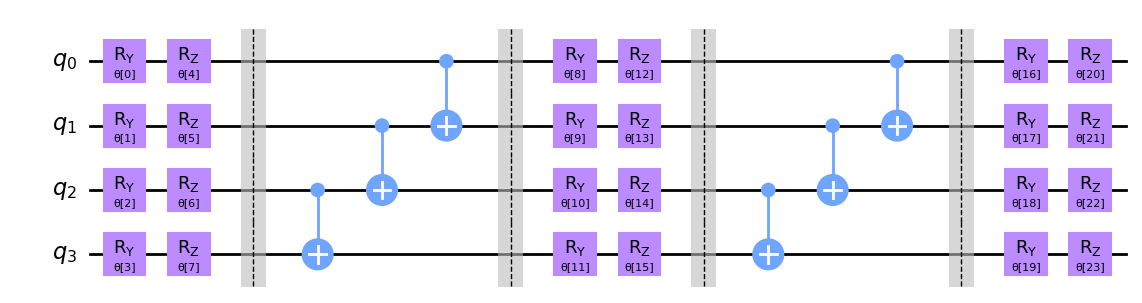

In [4]:
circuit = EfficientSU2(4, reps=2, insert_barriers=True)
circuit.decompose().draw(output="mpl", style="clifford")

Basically, as you can see, for `EfficientSU2` we have RY and RZ gates as single qubit gates. Then, we have some CNOT gates in each entanglement layer. 

`RealAmplitudes` is similar. The difference is that `RealAmplitudes` uses just RY, instead of both RZ and RY.

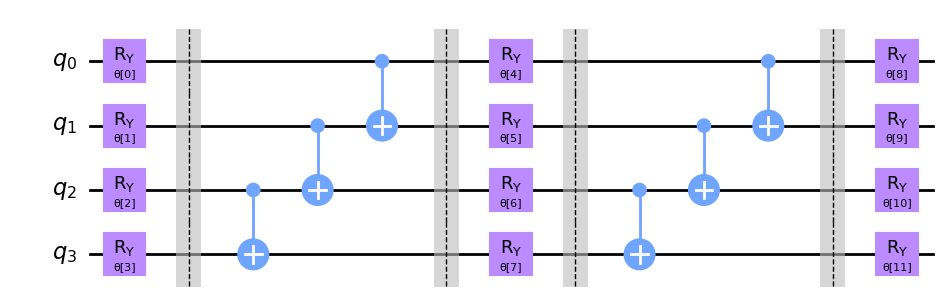

In [5]:
circuit = RealAmplitudes(4, reps=2, insert_barriers=True)
circuit.decompose().draw(output="mpl", style="clifford")

For the entanglement, there are some different options. In the two examples above, there are only nearest-neighbor entanglement, which makes them efficient to implement on certain types of hardware. We can also use other kinds of entanglement, if plausible.

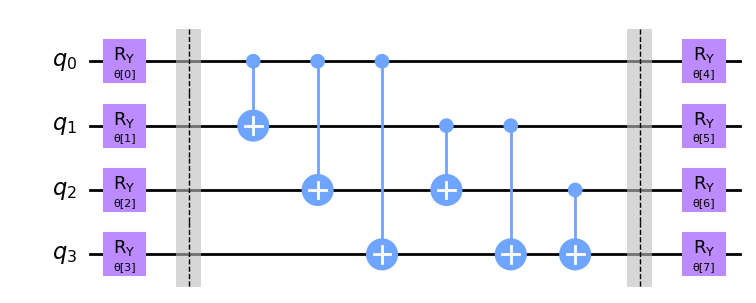

In [6]:
circuit = RealAmplitudes(4, reps=1, entanglement='full', insert_barriers=True)
circuit.decompose().draw(output="mpl", style="clifford")

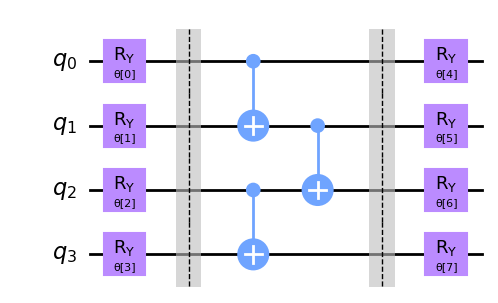

In [7]:
circuit = RealAmplitudes(4, reps=1, entanglement='pairwise', insert_barriers=True)
circuit.decompose().draw(output="mpl", style="clifford")

For pennylane, the ansatz are also similar.

`BasicEntanglerLayer` uses one parameter rotation (RX by default) for single qubit rotation layers. For entanglement, it uses circular entanglement.

![Basic entangler layer](https://docs.pennylane.ai/en/stable/_images/basic_entangler.png)

`StronglyEntanglingLayer` uses 3 Euler parameters to specify each rotation. For the entanglement, it uses CNOTs with some patterns.

![Strongly Entangling Layer](https://docs.pennylane.ai/en/stable/_images/layer_sec.png)

## Other comments

Pennylane has a template called `CVNeuralLayers`. However, its formalism seems very different from the qubit formalism. It is only usable on certain devices, and is not usable on IonQ or IBM.

![CVNeuralLayers](https://docs.pennylane.ai/en/stable/_images/layer_cvqnn.png)

See https://docs.pennylane.ai/en/stable/code/api/pennylane.CVNeuralNetLayers.html and https://quantumcomputing.stackexchange.com/questions/9679/pennylane-operations-kerr-displacement-and-squeeze.